## Salary Estimator for Tech Positions in the USA
### Made by:
- Matthew S. Horne

---

## Data Description

**I have chosen a Kaggle Database on the salaries earned by employees in job positions in the USA. I believe that analyzing this data can be interesting, even for personal benefit, as some friends and even myself are considering the possibility of going overseas to work. The data is specifically selected from companies in the Tech sector, although, as we will see, there are positions in Marketing and Human Resources, all of these are from technological companies.**

**The Database collects data from a sample of over 6500 employees, for whom the following information is provided:**

Age
Gender
Level of education
Job position
Years of experience in the position
Salary

**In this model, we will attempt to estimate an employee's salary based on the rest of the variables.**

# First econometrics models

### 1

In [72]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
import numpy as np
import statsmodels.stats.outliers_influence as oi
import statsmodels.graphics.api as smg
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as diag

For convenience, I like to have all the imports together and not have to repeat them or execute specific cells to avoid compiling the entire notebook

In [73]:
data = pd.read_csv('Salary_Data.csv')

X = data.values[:, [0, 4]].astype(int)  # Age, Years of Experience
Y = data.values[:, 5].astype(int)  # Salary

results = sm.OLS(Y, sm.add_constant(X)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     6539.
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        20:56:52   Log-Likelihood:                -77296.
No. Observations:                6582   AIC:                         1.546e+05
Df Residuals:                    6579   BIC:                         1.546e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.89e+04   3462.794     28.559      0.0

**R-squared:**

R-squared is a measure of how well the regression model fits the data. In this case, the value is 0.665, meaning that approximately 66.5% of the variability in the dependent variable (y) can be explained by the independent variables (x1 and x2) in the model. A higher R-squared value indicates a better fit of the model to the data. This value is expected to increase as the model becomes more complex and incorporates more key variables like Job Title or Education.

**Adjusted R-squared:**

Adjusted R-squared is similar to R-squared but takes into account the number of independent variables in the model. Here, the value is also 0.665, suggesting that the model's fit is consistent with the number of independent variables included.

**F-statistic:**

The F-statistic is used to evaluate the overall significance of all the independent variables in the model. A large F-statistic value (in this case, 6539) with a small p-value (0.00) suggests that at least one of the independent variables significantly explains variability in the dependent variable.

**Coefficients:**

Under the "coef" section, the estimated coefficients for the variables in the model are observed. In this model, there are three coefficients: one for the constant (intercept), one for x1, and another for x2. These coefficients indicate how much the dependent variable (y) changes per unit change in the independent variables (x1 and x2). For instance, the coefficient for x2 is 9044.7257, implying that, all other variables being constant (ceteris paribus), an increase of one unit in x2 is associated with an approximate increase of 9044.7257 units in the dependent variable (y), meaning that for every additional year of experience (Years of Experience = x2), the salary (Salary = y) increases by 9044.7257$.

**Additional Statistics:**

Several additional statistics are provided, such as the Omnibus, Durbin-Watson, Jarque-Bera, Skew, and Kurtosis. These statistics help evaluate assumptions about the model and the normality of the residual errors.

<div class="alert alert-info">
    <strong>Note: </strong> Since we are using a database with variables that are of string type, for this first model we will only use numeric variables and which have had to be necessarily converted to int because otherwise, it will generate a type error.
    <br><br>
    Later on, it will be necessary to convert the categorical variables into dummies for the correct functioning.

</div>

### 2 Test model (not related to the data)

In [74]:
n = 100

X = np.random.normal(0, 10, n)
Y = X + np.random.normal(0, 1, n)

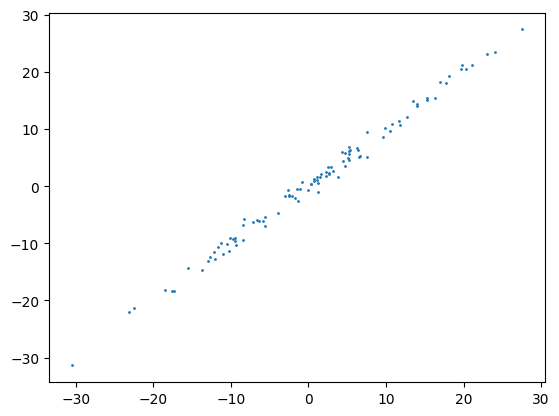

In [75]:
plt.scatter(X, Y, s=1)

plt.show()

In [76]:
results = sm.OLS(Y, sm.add_constant(X)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.323e+04
Date:                Mon, 12 May 2025   Prob (F-statistic):          2.31e-106
Time:                        20:56:52   Log-Likelihood:                -138.25
No. Observations:                 100   AIC:                             280.5
Df Residuals:                      98   BIC:                             285.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0958      0.098      0.980      0.3

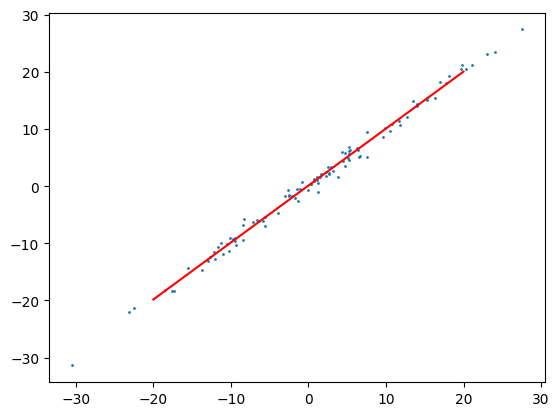

In [77]:
cte = results.params[0]
beta1 = results.params[1]

plt.plot([-20, 20], [cte + beta1 * (-20), cte + beta1 * 20], color='r')
plt.scatter(X, Y, s=1)

plt.show()

The code blocks perform a simulation of data and fit a linear regression model to such data.

1. **Data Generation:** Two datasets, X and Y, are created, where X are values taken from a normal distribution with a mean of 0 and standard deviation of 10, and Y is a linear function of X plus a normally distributed random error term. This simulates a linear relationship between X and Y with some noise.

2. **Data Visualization:** A scatter plot is generated using matplotlib to visualize the relationship between X and Y. Each point represents an observation from the simulated dataset.

3. **Fitting of Regression Model:** An ordinary least squares linear regression model is fitted using statsmodels with Y as the dependent variable and X as the independent. A constant is added to the model to include an intercept term. A summary of the model is printed, providing statistical details of the fit.

4. **Visualization of Regression Model:** The intercept and slope (coefficients) from the fitted model are extracted and used to draw the regression line over the existing scatter plot. The red line represents the estimated relationship between X and Y according to the regression model.

---

# Estimation and Inference in Linear Regression Models

## First Model

In [78]:
df = pd.read_csv('Salary_Data.csv')

# Displays descriptive statistics of the numerical variables
print(df.describe())

               Age  Years of Experience         Salary
count  6582.000000          6582.000000    6582.000000
mean     33.570799             8.071711  115768.665755
std       7.606075             6.042927   52677.912125
min      21.000000             0.000000   25000.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


1. **Count:** Displays the total number of non-null entries for each variable.
   - In this case, there are 6582 entries for each of the variables: Age, Years of Experience, and Salary.

2. **Mean:** It is the average of the values for each variable.
   - The average age is approximately 33.57 years.
   - The average years of experience are approximately 8.07 years.
   - The average salary is approximately 115,768.67 monetary units ($).

3. **Std (Standard Deviation):** Measures the amount of variation or dispersion of a set of values.
   - The standard deviation of age is approximately 7.6 years, indicating the variability of age in the dataset.
   - The standard deviation of years of experience is approximately 6.04 years.
   - The standard deviation of the salary is approximately 52,677.91, indicating the variability in salaries.

4. **Min (Minimum):** It is the lowest value in each column.
   - The minimum age is 21 years.
   - The minimum years of experience is 0 (people with no prior experience).
   - The minimum salary is 25,000.

5. **25% (25th Percentile):** This is the value below which 25% of the data falls.
   - 25% of the employees are 28 years or younger.
   - 25% have 3 years or less of experience.
   - 25% earn 70,000 or less.

6. **50% (Median or 50th Percentile):** It is the median value, where half of the data is below this value and the other half above.
   - The median age is 32 years.
   - The median years of experience is 7 years.
   - The median salary is 115,000.

7. **75% (75th Percentile):** The value below which 75% of the data falls.
   - 75% of the employees are 38 years or younger.
   - 75% have 12 years or less of experience.
   - 75% earn 160,000 or less.

8. **Max (Maximum):** It is the highest value in each column.
   - The maximum age is 62 years.
   - The maximum years of experience is 34 years.
   - The maximum salary is 250,000.

In [79]:
data = pd.read_csv('Salary_Data.csv')
data = pd.get_dummies(data, columns=['Education Level', 'Job Title', 'Gender'], dtype=int)

display(data)

,Age,Years of Experience,Salary,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Title_Back end Developer,Job Title_Content Marketing Manager,Job Title_Customer Service Representative,...,Job Title_Senior UX Designer,Job Title_Social Media Manager,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Software Project Manager,Job Title_Web Developer,Gender_Female,Gender_Male,Gender_Other
0,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,38,10,155000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,25,2,69032,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6578,23,2,62852,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6579,23,2,62852,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6580,31,8,104127,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


<div class="alert alert-info">
    <strong>Note:</strong> I have spent hours stuck creating dummies; when creating dummies by default, the types are set to TRUE or FALSE, however, we only work with numbers so, after hours I found out that it only needed to be cast to int type (dtype=int).

</div>

In [80]:
y = data['Salary']

# Filter columns that start with 'Education Level_', 'Job Title_', and 'Gender_*'
education_columns = [col for col in data if col.startswith('Education Level_')]
job_columns = [col for col in data if col.startswith('Job Title_')]
gender_columns = [col for col in data if col.startswith('Gender_')]

# Define 'X' including all columns of 'Education Level_', 'Job Title_', and 'Gender_*' + 'Years of Experience' and 'Age'
X = sm.add_constant(data[education_columns + ['Years of Experience'] + job_columns + ['Age'] + gender_columns])

## Descriptive Statistics:

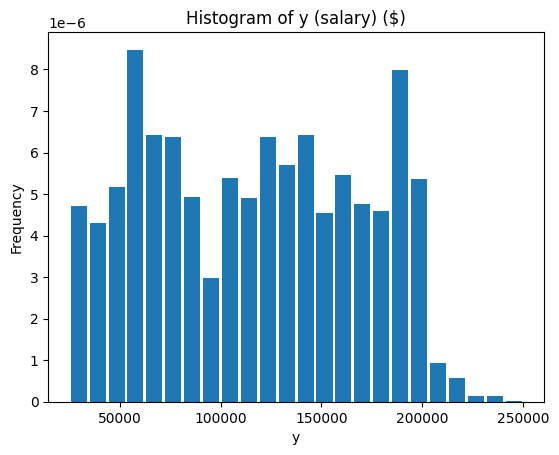

Q1:  70000.0 ($) mean: 115768.66575508963 ($) Q3:  160000.0 ($) SD:  52673.910308491184 ($) Mean: 115768.66575508963 ($)


In [81]:
mean = np.mean(y)
Q1 = np.quantile(y, 0.25)
Q3 = np.quantile(y, 0.75)
StandardDeviation = np.std(y)
mean = np.mean(y)
histogram = plt.hist(y, bins='auto', rwidth=0.85, density=True)
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title("Histogram of y (salary) ($)")
plt.show()
print("Q1: ", Q1, "($) mean:", mean, "($) Q3: ", Q3, "($) SD: ", StandardDeviation, "($) Mean:", np.mean(y), "($)")

1. Mean: 115,768.67
2. First Quartile (Q1): 70,000.00
3. Third Quartile (Q3): 160,000.00
4. Standard Deviation: 52,673.91
5. Median: 115,000.00

In [82]:
#np.asarray(education_columns)
ols1 = sm.OLS(y, X).fit()
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     328.4
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        20:56:53   Log-Likelihood:                -74882.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6478   BIC:                         1.507e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

<div class="alert alert-info">
    <strong>Note:</strong> As we can see, we are already being warned that there may be multicollinearity problems; we will try to solve it later on when the time comes, perhaps with a manual cleaning of the data or using techniques such as the variance inflation factor (VIF) to identify and possibly eliminate independent variables that are highly correlated.

</div>

## Interpretation of the Results

#### Goodness of Fit Measures:

- **R-squared:**
    The value is 0.839, which indicates that approximately 83.9% of the variability in the salary can be explained by the model. This is a quite high measure of goodness of fit considering that we are trying to estimate salaries.

- **Adjusted R-squared:**
    With a value of 0.837, after adjusting for the number of predictors, it remains very high, indicating that the model fits well to the data.

- **F-statistic:**
    With a value of 328.4 and a Prob (F-statistic) close to 0, it suggests that the model is statistically significant as a whole, that is, there is evidence that at least one of the independent variables is related to the salary.

#### Residual Diagnostics:
- **Durbin-Watson:**
    The value is 0.216, which is well below 2, suggesting the presence of positive autocorrelation among the residuals, which could be a problem since the residuals of a well-fitted model should be independent of each other.

- **Jarque-Bera (JB) and Prob(JB):**
    The JB statistic value is 178.435 and the p-value is extremely small, indicating that the residuals do not follow a normal distribution, which is a violation of one of the assumptions of OLS regression.

- **Skew:**
    The value of -0.062 indicates that the distribution of residuals is slightly asymmetrical, but it is not a major concern given that it is close to zero.

- **Kurtosis:**
    A value of 3.797 suggests that the distribution of the residuals has heavier tails than a normal distribution, which could be a sign of outliers or a more pronounced peak.

- **Cond. No. (Condition Number):**
    The value is extremely high (4.75e+16), indicating the presence of multicollinearity among the predictor variables. This means that some of the independent variables are highly correlated with each other, which can inflate the standard errors of the coefficients and make the estimates unstable.

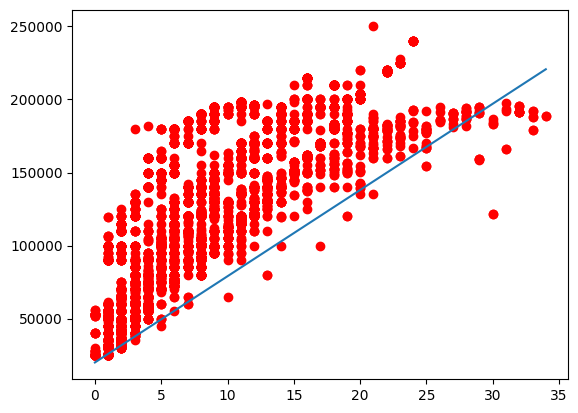

In [83]:
beta2 = ols1.params
plt.plot(data['Years of Experience'], y, 'o', color='r')
xmin = np.min(data['Years of Experience'])
xmax = np.max(data['Years of Experience'])

plt.plot([xmin, xmax], [beta2.iloc[0] + beta2.iloc[1] * xmin, beta2.iloc[0] + beta2.iloc[1] * xmax])
plt.show()

Figure(640x480)


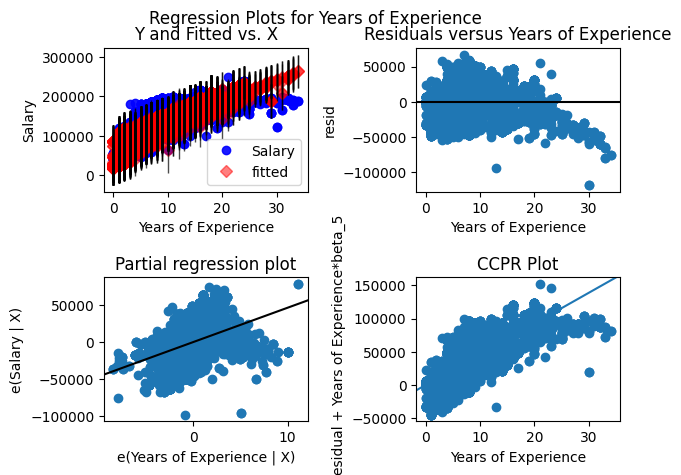

In [84]:
print(sm.graphics.plot_regress_exog(ols1, 'Years of Experience'))

In [85]:
e = ols1.resid
print(e)
print(np.mean(e))

0       -9564.773378
1       -9564.773378
2       -9564.773378
3       -9564.773378
4       25592.649552
            ...     
6577    18946.239792
6578    28045.751309
6579    28045.751309
6580    29335.151228
6581    29335.151228
Length: 6582, dtype: float64
-5.779378693431969e-10


The obtained value suggests that, on average, the model slightly underestimates the actual value. However, in the context of regression models, an average of residuals of about -5.7624e-10 could be considered negligible, especially if the scale of the response variable (salary in this case) is large, as in tens or hundreds of thousands. This result is a sign that the model is well-calibrated in terms of not having a systematic bias towards overestimation or underestimation in the predictions.

- Total Sum of Squares (SST)

In [86]:
print(ols1.centered_tss)

18262027724544.66


It represents the total variability in the dependent variable. It is equal to the sum of the squared differences between each observed value and the mean of all observed values. A value of 18262027724544.66 indicates the total variability in your dependent variable that the model seeks to explain.

- Explained Sum of Squares (ESS)

In [87]:
print(ols1.ess)

15326748750986.516


Represents the variability in the dependent variable that is explained by the model. It is equal to the sum of the squared differences between the predicted values by the model and the mean of the dependent variable. A value of 15326748750986.516 suggests that this is the amount of variability that the model has managed to explain.

- Residual Sum of Squares (RSS)

In [88]:
print(ols1.ssr)

2935278973558.1455


Represents the variability in the dependent variable that is not explained by the model. It is equal to the sum of the squares of the residuals (errors) from the model. A value of 2935278973558.1436 indicates the amount of variability that the model has not been able to explain.

- $R^2$ and Adjusted $R^2$

In [89]:
print("R2: ", ols1.rsquared)
print("R2 Ajustado: ", ols1.rsquared_adj)

R2:  0.8392687264616814
R2 Ajustado:  0.8367131041747955


R-squared ($R^2$): Is a measure of the goodness of fit of the model. A value of 0.8392687264616815 (or approximately 83.93%) means that about 83.93% of the variability in the dependent variable is explained by the independent variables in the model.

Adjusted R-squared: Is an adjusted version of R-squared that takes into account the number of predictors in the model. A value of 0.8367131041747956 is quite close to the R-squared, indicating that the model is robust even after adjusting for the number of variables.

- Experimental F-value ( F<sub>exp</sub> )
- Theorical F-value ( F<sub>teo</sub> )


In [90]:
Fexp = ols1.fvalue
print(Fexp)
from scipy import stats

alpha = 0.025
Fteo = stats.f.ppf(1 - alpha, ols1.df_model, ols1.df_resid)
print(Fteo)

328.4009263686447
1.2941958816630579


Experimental F-value (Fexp): Is the calculated value of the F statistic for the model. A value of 328.40092636864495 is quite high, suggesting that the model is statistically significant.

Theoretical F-value (Fteo): Is the critical value of the F-distribution for a certain level of significance and degrees of freedom. A value of 1.2941958816630579 is the threshold above which the model would be considered to have a significant contribution.

- Experimental t-value ( t<sub>exp</sub> )
- Theorical t-value ( t<sub>teo</sub> )

In [91]:
texp = ols1.tvalues
print(texp)
alpha = 0.098
tteo = stats.t.ppf(1 - (alpha / 2), ols1.df_resid)
print(tteo)

const                                 8.568314
Education Level_Bachelor's Degree     6.558402
Education Level_High School          -6.227709
Education Level_Master's Degree      11.953818
Education Level_PhD                   9.801300
                                       ...    
Job Title_Web Developer              -5.079476
Age                                   4.909789
Gender_Female                         7.350917
Gender_Male                           7.415737
Gender_Other                         -1.440958
Length: 107, dtype: float64
1.6548666162477454


Experimental t-Value (t-Test Value): This value is the result of a Student's t-test applied to an estimator, such as a coefficient in a regression model. It is calculated as the estimated coefficient divided by the standard error of that coefficient. In the context of regression, it indicates how many standard deviations the estimator is away from 0. A high t-value (in absolute terms) suggests that it is less likely that the true value of the parameter is 0, implying that the corresponding variable is significant in the model.

Theoretical t-Value (Critical t-Value): Is used as a threshold to decide whether to reject the null hypothesis. If the experimental t-value is greater in absolute value than the theoretical t-value, the null hypothesis is rejected (for example, that a coefficient is equal to zero in regression).

- Confidence Intervals of Estimators

In [92]:
print(ols1.conf_int(0.075))

                                              0             1
const                              15763.161180  24034.249186
Education Level_Bachelor's Degree   4302.478576   7509.763215
Education Level_High School       -13077.577773  -7261.750911
Education Level_Master's Degree     9897.452337  13362.463899
Education Level_PhD                10255.359086  14809.221935
...                                         ...           ...
Job Title_Web Developer           -16743.255868  -8050.957384
Age                                  371.632352    794.627903
Gender_Female                       9887.910509  16210.129328
Gender_Male                        10092.445489  16471.212285
Gender_Other                      -14381.054794   1516.767548

[107 rows x 2 columns]


A confidence interval provides a range of values within which the true value of the parameter is expected to fall, with a certain level of confidence.
In regression, each coefficient has an associated confidence interval. If a confidence interval for a coefficient does not include 0, this suggests that the corresponding variable is significantly different from 0, implying that it has a significant effect on the dependent variable.

- Estimation of the disturbance variance:

In [93]:
beta3 = np.array(ols1.params)
e = ols1.resid
sum(e ** 2) / (ols1.nobs - 1)
sigmagorro = (np.dot(y.values, y.values) - np.dot(beta3.T, np.dot(X.values.T, y.values))) / (ols1.nobs - 1)

print(sigmagorro)

446023244.72842747


A low value indicates that the model explains a large part of the variability, while a high value suggests that there are more uncaptured factors influencing salaries.
In our case, we see that the value is high and that the residuals are not normally distributed, it may be necessary to transform the variables, add terms to the model, or use another type of regression model that does not require normality of the residuals.

---

# Multicollinearity

As we have previously seen, our current model has a multicollinearity problem that we will try to resolve now. Let's refresh our memory:

In [94]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     328.4
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        20:56:54   Log-Likelihood:                -74882.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6478   BIC:                         1.507e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

And as we have mentioned, it warns us of possible multicollinearity.

In [95]:
print(ols1.condition_number)  #Condition Number

4.442347874120708e+16


A high condition number suggests possible multicollinearity in the data, meaning that at least one of the predictor variables is almost a linear combination of the others. This can lead to problems in estimating the coefficients of the model, as small changes in the data or in the model can result in large changes in the estimated coefficients. In practical terms, a high condition number can make the results of the regression unreliable.

**In general terms:**

- A condition number close to 1 indicates a well-conditioned problem (low risk of multicollinearity).
- A moderately high condition number (values in the thousands or tens of thousands) may be cause for some concern and warrants further investigation.
- A very high condition number (values in the hundreds of thousands or more) suggests a high degree of multicollinearity and a potentially poorly conditioned problem.

In our case, we see that this is an enormous number, the error is possibly due to the creation of the dummies which create 200 different new variables.
Therefore, we are going to use techniques such as the variance inflation factor (VIF) to identify and possibly eliminate independent variables that are highly correlated.

In [96]:
data = pd.read_csv('Salary_Data.csv')
data = pd.get_dummies(data, columns=['Education Level', 'Job Title', 'Gender'], dtype=int)

display(data)

,Age,Years of Experience,Salary,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Title_Back end Developer,Job Title_Content Marketing Manager,Job Title_Customer Service Representative,...,Job Title_Senior UX Designer,Job Title_Social Media Manager,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Software Project Manager,Job Title_Web Developer,Gender_Female,Gender_Male,Gender_Other
0,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,38,10,155000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,25,2,69032,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6578,23,2,62852,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6579,23,2,62852,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6580,31,8,104127,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
y = data['Salary']

education_columns = [col for col in data if col.startswith('Education Level_')]
job_columns = [col for col in data if col.startswith('Job Title_')]
gender_columns = [col for col in data if col.startswith('Gender_')]

X = sm.add_constant(data[education_columns + ['Years of Experience'] + job_columns + ['Age'] + gender_columns])

In [98]:
vifs = [oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

C:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


[0.0, inf, inf, inf, inf, 11.453897890225157, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 11.852499000546821, inf, inf, inf]


We observe the warning "RuntimeWarning: divide by zero encountered in scalar divide" which suggests that in the calculation of some VIF, a division by zero is being attempted. This usually occurs when one of the independent variables in the regression model is a perfect linear combination of other independent variables, or it has an extremely low variance that is causing numerical issues.

The VIF values are displayed in the output, and many of them are infinite, denoted by inf. An infinite VIF value indicates perfect multicollinearity, meaning that some predictor variables can be exactly predicted from other predictor variables in the model without error.

In [99]:
corr_matrix = np.corrcoef(X.T)
print(corr_matrix)

[[        nan         nan         nan ...         nan         nan
          nan]
 [        nan  1.         -0.24296903 ... -0.1037192   0.1075222
  -0.04155774]
 [        nan -0.24296903  1.         ...  0.06142793 -0.07481163
   0.14482651]
 ...
 [        nan -0.1037192   0.06142793 ...  1.         -0.99571119
  -0.04162161]
 [        nan  0.1075222  -0.07481163 ... -0.99571119  1.
  -0.05099286]
 [        nan -0.04155774  0.14482651 ... -0.04162161 -0.05099286
   1.        ]]


C:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


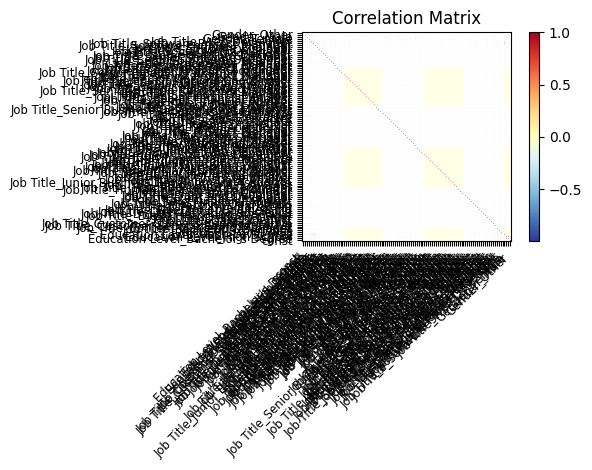

In [100]:
smg.plot_corr(corr_matrix, X)
plt.show()

It is quite evident what could be the first remedy for this problem... Reducing the number of variables, this will be achieved by studying which variables have no relevance to eliminate them and by grouping those that are positive for the model.

Let's do a very simple first test just by adding drop_first=True when creating the dummies to eliminate the first column.

In [101]:
data = pd.read_csv('Salary_Data.csv')
data = pd.get_dummies(data, columns=['Education Level', 'Job Title', 'Gender'], drop_first=True, dtype=int)
y = data['Salary']

education_columns = [col for col in data if col.startswith('Education Level_')]
job_columns = [col for col in data if col.startswith('Job Title_')]
gender_columns = [col for col in data if col.startswith('Gender_')]

X = sm.add_constant(data[education_columns + ['Years of Experience'] + job_columns + ['Age'] + gender_columns])

ols1 = sm.OLS(y, X).fit()
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     328.4
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        20:57:05   Log-Likelihood:                -74882.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6478   BIC:                         1.507e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [102]:
print(ols1.condition_number)  #Condition Number

2939.316608771346


Simply with that previous step, we have gone from a Condition Number = (4.75e+16) that our original model had to a Condition Number = (2.94e+03).

And we run the VIF technique again.

In [103]:
vifs = [oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

[148.19105092564013, 4.2102188580367645, 1.9856541197490913, 3.6789174734278745, 11.453897890225157, 1.3273319305841709, 1.0635226254644397, 1.0048567853056714, 2.3898331399586765, 3.3892226324651946, 1.0650371655378517, 1.208548062396626, 1.0712235459423314, 1.4013652344021479, 1.0123202355120628, 1.3812686850558464, 1.4332269841357237, 1.0757701998016587, 1.159252923866036, 1.5805370304551516, 1.1310616262511977, 1.9341299734744708, 2.231540372903409, 1.1012763523009328, 1.2332222731145275, 1.4881802206694172, 1.017376890469244, 1.0369107018232517, 1.0318887883088288, 1.1074113101102547, 1.0371535813078459, 1.1870299335761751, 1.3617055692448679, 1.0143528892916747, 1.0285011373286874, 1.2196496684876497, 1.0134849331492133, 1.018366681284566, 1.0182269873512853, 1.0090235071061415, 2.825856719009788, 1.3013865452632993, 1.2736857143834879, 1.2240819840570956, 1.1864867240984776, 1.040162586502373, 1.027268328149253, 1.5496521812985549, 1.6909544539512849, 1.3320356508719489, 2.09615

As we can see, almost all the variables are now close to the value of 1, which as we have seen indicates a well-conditioned problem (low risk of multicollinearity).

But we can continue to refine it. If we look closely, there are 2 variables in particular that stand out more than the others, the first with an approximate value of 148.191 and the penultimate with an approximate value of 11.852499.

Seeing this and also with a bit of common sense we can reason that when estimating salaries, both the age and the gender of the person should not be a factor influencing the result, so let's eliminate those 2 variables and see what happens.

In [104]:
data = pd.read_csv('Salary_Data.csv')
data = pd.get_dummies(data, columns=['Education Level', 'Job Title', 'Gender'], drop_first=True, dtype=int)

#data.drop('Job Title_Data Analyst', axis=1, inplace=True)
#data.drop('Job Title_Marketing Manager', axis=1, inplace=True)
#data.drop('Job Title_Web Developer', axis=1, inplace=True)

y = data['Salary']

education_columns = [col for col in data if col.startswith('Education Level_')]
job_columns = [col for col in data if col.startswith('Job Title_')]
gender_columns = [col for col in data if col.startswith('Gender_')]

X = sm.add_constant(data[education_columns + ['Years of Experience'] + job_columns])
#X = sm.add_constant(data[education_columns + job_columns])
#X = sm.add_constant(data[education_columns + ['Years of Experience']])

ols1 = sm.OLS(y, X).fit()
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     336.1
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        20:57:13   Log-Likelihood:                -74901.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6481   BIC:                         1.507e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [105]:
vifs = [oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

[30.43895837426429, 3.827853952881451, 1.9343164521286287, 3.509714269619452, 2.292112043189959, 1.3069205114368063, 1.05651716793206, 1.0043740352642012, 2.376873090341054, 3.318072084438276, 1.0605458106047099, 1.2068230699613596, 1.0629537897116417, 1.3949935270744722, 1.0121774879348624, 1.3754426370522246, 1.4198674598323853, 1.0745321596824158, 1.1566836284349724, 1.5441942410006697, 1.12965496812057, 1.9275512960801444, 2.215205207043957, 1.0942517020046132, 1.2183583723920839, 1.4227358524077267, 1.0171058042795966, 1.0338461585984084, 1.0299049870443142, 1.1059105818713106, 1.0336250620872127, 1.170468116863067, 1.3371096796912878, 1.012702309548931, 1.0255574780828893, 1.2115908641969517, 1.0125523093272892, 1.0169337460453673, 1.0168428706230352, 1.0084240881830049, 2.6704545945049762, 1.2774336857713475, 1.2484778049046936, 1.2201306430541818, 1.1787572973084364, 1.0361113865251108, 1.0239645562867299, 1.546827064856513, 1.6108375130052508, 1.3177328259794712, 2.06278205442

In [106]:
print(ols1.condition_number)  #Condition Number

833.5492164806737


Indeed, by eliminating variables that do not have a direct relationship with the salary, the Condition Number = (2.94e+03) that our model had with Age and Gender has been reduced to just a Condition Number = 834 without sacrificing the R-squared measure.

We are no longer warned that there may be problems with multicollinearity, but let's try to reduce the number of variables by grouping elements of the Job Title variable by sectors, this can lead to more imprecise estimates by having more general data from each area but let's try to see what Condition Number would result.

<div class="alert alert-info">
    <strong>Note:<br><br></strong> You can try by removing the '#' that I have placed in the cell above.
    <br><br>
    Eliminating the 'Years of Experience' variable, the Cond. No. goes from 833.5492 to 89.2, but R-squared is affected by a decrease from 0.838 to 0.680.
    <br><br>
    Eliminating the 'job_columns' variable, the Cond. No. goes from 833.5492 to 43.8, but R-squared is affected by a decrease from 0.838 to 0.709.
    <br><br>
    The data.drop commands are not necessary but are there because they can reduce the value of the VIF indices. They simply remove more columns.
</div>

**For this next test, I created a duplicate of the database, but I have significantly reduced the number of variables, especially from the Job Titles column in which I have grouped similar Positions into one.**

In [107]:
data = pd.read_csv('Salary_Data - Copy.csv')
data = pd.get_dummies(data, columns=['Education Level', 'Job Title'], drop_first=True, dtype=int)

y = data['Salary']

education_columns = [col for col in data if col.startswith('Education Level_')]
job_columns = [col for col in data if col.startswith('Job Title_')]

X = sm.add_constant(data[education_columns + ['Years of Experience'] + job_columns])

ols2 = sm.OLS(y, X).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1408.
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        20:57:20   Log-Likelihood:                -70773.
No. Observations:                6131   AIC:                         1.416e+05
Df Residuals:                    6115   BIC:                         1.417e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [108]:
vifs = [oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

[33.82647625096572, 1.883492153943134, 1.5633028826938056, 2.362941630731331, 1.7651020579063148, 5.444153999998622, 3.0662473983740246, 4.162153326378484, 5.566408763428103, 1.800650564130763, 3.2190383733654935, 5.113969904266794, 1.7406847624220203, 3.016237063243226, 4.081734355444842, 5.079922471776115]


In [109]:
corr_matrix = np.corrcoef(X.T)
print(corr_matrix)

[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan  1.         -0.16396765 -0.13052986 -0.24728956 -0.10895694
  -0.06877541 -0.03583651 -0.07292447 -0.01667689  0.05223703 -0.08898534
  -0.03944413 -0.06670834  0.65979148 -0.0911176 ]
 [        nan -0.16396765  1.         -0.32851679  0.15082559 -0.15402567
  -0.06172485 -0.00985305  0.19665406  0.01315989  0.12405858  0.16345379
  -0.09451984  0.05642932 -0.16681462 -0.07186532]
 [        nan -0.13052986 -0.32851679  1.          0.4918669   0.08145064
  -0.12818476 -0.17746974  0.04927165 -0.07071985 -0.02484736 -0.05748777
  -0.07902814 -0.1254299  -0.10360137  0.51126169]
 [        nan -0.24728956  0.15082559  0.4918669   1.          0.05274751
  -0.13871538 -0.19130701  0.28127107  0.05993263 -0.02597449  0.06929764
  -0.11961223 -0.06225298 -0.21713667  0.21166372]
 [   

C:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


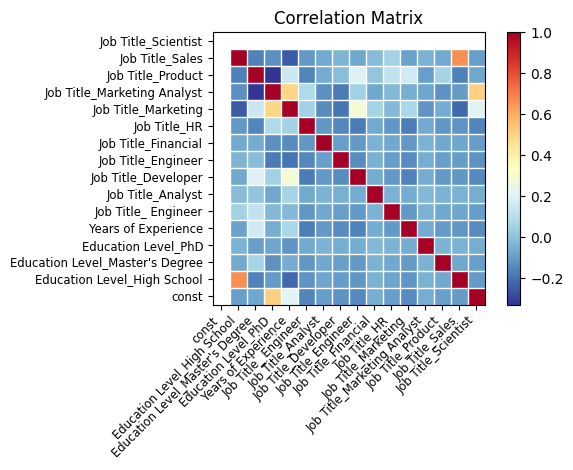

In [110]:
smg.plot_corr(corr_matrix, X)
plt.show()

**As we see, this reduction/grouping of data has again reduced the Cond. No. from 834 to 213.**

**Moreover, all this has been possible without sacrificing the goodness of fit, which continues to be quite good, thus solving the problem of multicollinearity.**

# Heteroscedasticity

**Previously, we have solved multicollinearity, now we are going to check if our model follows a normal distribution of residuals (homoscedasticity) or not (heteroscedasticity).**

### OLS1

In [111]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     336.1
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        20:57:20   Log-Likelihood:                -74901.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6481   BIC:                         1.507e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [112]:
name = ['Jarque-Bera Est', 'Jarque-Vera p-val', 'Skew', 'Kurtosis']
test = sms.jarque_bera(ols1.resid)
for i in range(4):
    print(name[i], test[i])

Jarque-Bera Est 187.68008386575872
Jarque-Vera p-val 1.761114557414213e-41
Skew -0.1125387187513356
Kurtosis 3.796039923359463


- The Jarque-Bera statistic is 187.68, which is very high. This test combines skewness and kurtosis to assess whether the distribution of residuals deviates from normality. A higher value indicates a greater deviation from normality.

- The p-value associated with the Jarque-Bera statistic is extremely small (around 1.76e-41). Such a low p-value indicates that we can reject the null hypothesis that the residuals have a normal distribution.

- The skewness of the residuals is -0.1125, indicating a slight leftward skew. However, this value is quite close to zero, suggesting that the skewness is not very pronounced.

- The kurtosis is 3.7960, which is slightly higher than the value of 3 expected from a normal distribution. This indicates that the distribution of residuals has slightly heavier tails than a normal distribution, although this value is not too far from 3.

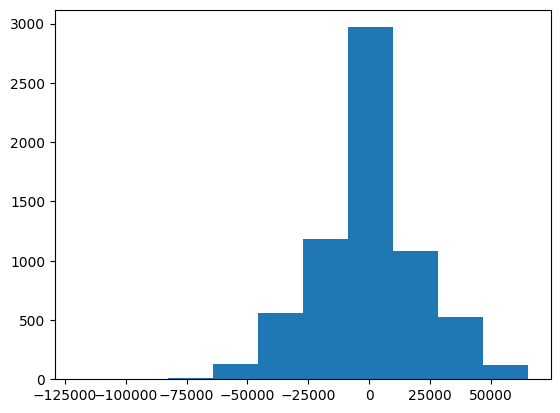

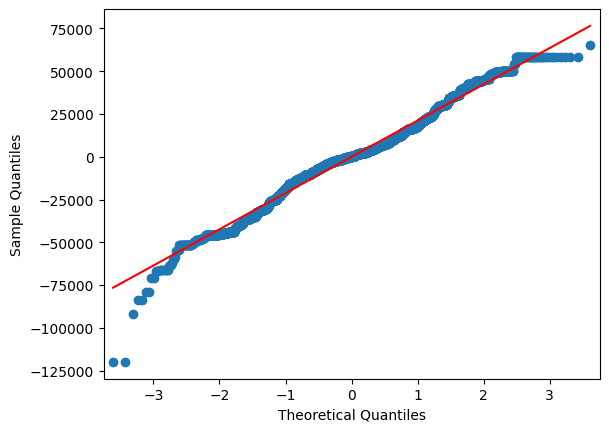

In [113]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

pyplot.hist(ols1.resid)
pyplot.show()
qqplot(ols1.resid, line='s')
pyplot.show()

In [114]:
print(diag.kstest_normal(ols1.resid))

(0.06763807355054596, 0.0009999999999998899)


- The first value (0.0676) is the Kolmogorov-Smirnov D statistic, which measures the maximum distance between the cumulative distribution function (CDF) of the residuals and the CDF of a normal distribution. A higher value indicates a greater deviation from normality.

- The second value (approximately 0.0) is the p-value of the test. Since it is lower than any commonly used threshold for statistical significance (such as 0.05 or 0.01), the null hypothesis that the distribution of residuals is normal is rejected

### Bootstrapping

In [115]:
data = pd.read_csv('Salary_Data.csv')
data = pd.get_dummies(data, columns=['Education Level', 'Job Title', 'Gender'], drop_first=True, dtype=int)

y = data['Salary']

# Define 'X' including all columns of 'Education Level_*' and 'Years of Experience'
# Filter columns that start with 'Education Level_'
education_columns = [col for col in data if col.startswith('Education Level_')]
job_columns = [col for col in data if col.startswith('Job Title_')]

X = sm.add_constant(data[education_columns + ['Years of Experience'] + job_columns])

from random import choices

beta = []
n = len(y)
for it in range(100):  #we repeat the estimation 100 times
    I = choices(list(range(n)), k=n)  # we choose a sample with repetition of the data
    ols3 = sm.OLS(y[I], sm.add_constant(X.values[I, :])).fit()  # we fit the model
    beta.append(list(ols3.params))  # we save the coefficients
beta = np.array(beta)
k = len(X.T)
for i in range(k):
    q025 = np.percentile(beta[:, i], 2.5)  #2.5th percentile
    q975 = np.percentile(beta[:, i], 97.5)  #97.5th percentile
    mean = np.mean(beta[:, i])  #mean of the betas
    sd = np.std(beta[:, i])  #standard deviation of the betas
    print(i, mean, [q025, q975])

0 69556.52638963782 [67385.12040175422, 71575.65261433086]
1 -19207.180393589886 [-21815.15954427019, -16292.714707039298]
2 6037.979241515841 [4297.355678627451, 7791.568872160014]
3 8176.559199854626 [5049.772185826304, 11099.32126096231]
4 5247.307330869658 [5096.528014446089, 5456.638312991233]
5 -7441.451494437321 [-11208.69132667169, -3765.698606959049]
6 -30912.94753832021 [-39155.03242749421, -24182.092579605185]
7 -21996.79771666229 [-36647.022006909894, 4.986872318996045e-10]
8 28262.28592109303 [24644.594335138765, 31969.123267789717]
9 30479.029182955524 [25507.975167137192, 33950.10387555359]
10 -22349.345996047672 [-25853.43690163264, -19318.466738546726]
11 -15528.826738838865 [-19155.038832134058, -12565.120540661226]
12 -25461.783152595814 [-27510.714560690623, -23517.480732192034]
13 37676.14004489576 [34473.54248874575, 42042.96750522959]
14 812.2629751243716 [-4930.468903504545, 6715.135286946888]
15 -15866.022962446443 [-18355.92995032185, -12335.048322097568]
16 -

Initializes an empty beta list to store the results of the coefficients from the bootstrap simulations. Perform 100 bootstrap iterations. In each iteration:
- Select a random sample with replacement from the indices of the data (this simulates resampling of the data).
- Fit a linear regression model to the resampled sample.
- Save the estimated coefficients of the model in the beta list.

The calculated percentiles represent the 95% confidence interval limits for the coefficients, based on the bootstrap distribution. The purpose of this process is to estimate the distribution of the regression model coefficients beyond what the model fitted to the original data can provide. Bootstrapping is especially useful when the distribution of the estimators is not known or is difficult to derive analytically. The confidence intervals calculated from the bootstrap distribution can provide a robust measure of the uncertainty in the estimations of the coefficients.

In [116]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     336.1
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        20:57:28   Log-Likelihood:                -74901.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6481   BIC:                         1.507e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [117]:
#GOLDFELD-QUANDT (Muestras Pequeñas)
GQ = sms.het_goldfeldquandt(y, sm.add_constant(data["Years of Experience"]), split=1 / 3, drop=1 / 3)
print("Goldfeld Quandt: ", GQ)

Goldfeld Quandt:  (0.9108367992624629, 0.9855773263736517, 'increasing')


- 0.910837699262646 is the test statistic for the Goldfeld-Quandt.
- 0.9855773263763483 is the p-value of the test.

Given that the p-value is high, there is not enough evidence to reject the null hypothesis of homoscedasticity, which means that there is no evidence of heteroscedasticity in the data according to this test; therefore, we will continue testing with other variables and methods.

In [118]:
#GOLDFELD-QUANDT (Muestras Pequeñas)
GQ = sms.het_goldfeldquandt(y, sm.add_constant(data["Job Title_Data Scientist"]), split=1 / 3, drop=1 / 3)
print("Goldfeld Quandt: ", GQ)
GQ = sms.het_goldfeldquandt(y, sm.add_constant(data["Job Title_Software Engineer"]), split=1 / 3, drop=1 / 3)
print("Goldfeld Quandt: ", GQ)
GQ = sms.het_goldfeldquandt(y, sm.add_constant(data["Job Title_Product Manager"]), split=1 / 3, drop=1 / 3)
print("Goldfeld Quandt: ", GQ)

Goldfeld Quandt:  (1.079996969360246, 0.03582525237568214, 'increasing')
Goldfeld Quandt:  (0.9406042555898256, 0.9241164212747397, 'increasing')
Goldfeld Quandt:  (1.0303003879061037, 0.2423737511305098, 'increasing')


In [119]:
#GOLDFELD-QUANDT (Muestras Pequeñas)
GQ = sms.het_goldfeldquandt(y, sm.add_constant(data["Education Level_PhD"]), split=1 / 3, drop=1 / 3)
print("Goldfeld Quandt PhD: ", GQ)
GQ = sms.het_goldfeldquandt(y, sm.add_constant(data["Education Level_Master\'s Degree"]), split=1 / 3, drop=1 / 3)
print("Goldfeld Quandt Master: ", GQ)
GQ = sms.het_goldfeldquandt(y, sm.add_constant(data["Education Level_High School"]), split=1 / 3, drop=1 / 3)
print("Goldfeld Quandt HS: ", GQ)

Goldfeld Quandt PhD:  (0.8573587850660621, 0.999841192601101, 'increasing')
Goldfeld Quandt Master:  (0.9859492655103055, 0.6297581076460388, 'increasing')
Goldfeld Quandt HS:  (1.193158224426772, 1.8056629526716686e-05, 'increasing')


With a few more tests, we observed how the p-value for 'Education Level_High School' is minuscule. A p-value below a common significance level (like 0.05 or 0.01) indicates that there is sufficient evidence to reject the null hypothesis that the variance of the residuals is constant throughout the range of the data, that is, that there is heteroscedasticity. However, to confirm the hypothesis, we corroborate it with other techniques for detecting heteroscedasticity.

In [120]:
print(y)

0       155795
1       155795
2       155795
3       155795
4       155000
         ...  
6577     69032
6578     62852
6579     62852
6580    104127
6581    104127
Name: Salary, Length: 6582, dtype: int64


In [121]:
#BREUSH-PAGAN
BP = sms.het_breuschpagan(ols1.resid, ols1.model.exog)
print("Breush Pagan: ", BP)

Breush Pagan:  (2636.2711196503446, 0.0, 43.30169062436905, 0.0)


In [122]:
#WHITE
W = sms.het_white(ols1.resid, ols1.model.exog)
print("White: ", W)

White:  (4182.396997153987, 0.0, 41.87065265112898, 0.0)


**In both cases, the reported p-values are 0.0, indicating that there is significant statistical evidence to reject the null hypothesis that the errors are homoscedastic (have constant variances). This means that the results of both tests point to the presence of heteroscedasticity in the residuals of the model.**

In [123]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     336.1
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        21:02:02   Log-Likelihood:                -74901.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6481   BIC:                         1.507e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [124]:
#GLEJSER
for h in [-2, -1, -0.5, 0.5, 1, 2]:
    # Make sure there are no zeros in the data before raising to a negative power
    X_nonzero = X.replace(0, np.nan)  # Replace 0 with NaN to avoid divisions by zero
    X_transformed = X_nonzero.astype(float) ** h  # Raise to the power of h
    X_transformed = X_transformed.fillna(0)  # Replace NaNs with 0s if necessary, depending on the context
    X_transformed = X_transformed.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
    X_transformed = X_transformed.dropna(axis=1, how='all')  # Remove columns where all values are NaN

    olsaux = sm.OLS(abs(ols1.resid), sm.add_constant(X_transformed)).fit()
    beta3 = olsaux.params
    pval = beta3.iloc[1]
    print("h: ", h, "-> pval:", pval, "R2: ", olsaux.rsquared)


h:  -2 -> pval: -1121.3066387636766 R2:  0.523435149723871
h:  -1 -> pval: -954.6005847245269 R2:  0.5238683473871594
h:  -0.5 -> pval: -895.6405674438104 R2:  0.5261917096444171
h:  0.5 -> pval: 22.2876609596417 R2:  0.5362475062627842
h:  1 -> pval: -464.81184625297635 R2:  0.5447958389819474
h:  2 -> pval: -1413.3507550998138 R2:  0.5603255756532204


<div class="alert alert-info">
    <strong>Note:</strong> The Glejser test is a method used to detect heteroscedasticity in the errors of a regression model. It specifically looks for relationships between the absolute values of the residuals of a regression model and the independent variables or transformations of these variables. If there is a significant relationship, it suggests that the variance of the errors changes with the level of the independent variable, which is a form of heteroscedasticity.
</div>

For h= −2, the p-value is very small, suggesting that there is a significant relationship between the residuals and the independent variables raised to the power of -2, indicating heteroscedasticity.
This pattern repeats for other values of h, with very small p-values, indicating that heteroscedasticity is consistently detected for various transformations of the independent variables.

In [125]:
mcp = sm.WLS(y, sm.add_constant(X), weights=1 / y).fit()
print(mcp.summary())

                            WLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.883
Model:                            WLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     487.7
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        21:02:03   Log-Likelihood:                -74134.
No. Observations:                6582   AIC:                         1.485e+05
Df Residuals:                    6481   BIC:                         1.492e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

**Since with ols1 we are not achieving the desired results in heteroscedasticity, nor by applying other regression models such as weighted least squares (WLS), let's try with a variant of ordinary least squares regression which we will call ols2**

### OLS2

Let's refresh our memory about ols2

In [126]:
data = pd.read_csv('Salary_Data - Copy.csv')
data = pd.get_dummies(data, columns=['Education Level', 'Job Title'], drop_first=True, dtype=int)
y = data['Salary']

# Define 'X' including all columns of 'Education Level_*' and 'Years of Experience'
# Filter columns that start with 'Education Level_'
education_columns = [col for col in data if col.startswith('Education Level_')]
job_columns = [col for col in data if col.startswith('Job Title_')]

X = sm.add_constant(data[['Years of Experience'] + job_columns + education_columns])

ols2 = sm.OLS(y, X).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1408.
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        21:02:03   Log-Likelihood:                -70773.
No. Observations:                6131   AIC:                         1.416e+05
Df Residuals:                    6115   BIC:                         1.417e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [127]:
#BREUSH-PAGAN
BP = sms.het_breuschpagan(ols2.resid, ols2.model.exog)
print("Breush Pagan: ", BP)

Breush Pagan:  (1366.2155434108906, 3.063779161951745e-282, 116.89102447442268, 2.464e-320)


In [128]:
#WHITE
W = sms.het_white(ols2.resid, ols2.model.exog)
print("White: ", W)

White:  (2635.813463260848, 0.0, 84.85321823594849, 0.0)


In [129]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(ols2.resid)
print(dw)

0.20593535621887013


**Although there is an improvement in ols2 compared to ols1, we see that the tests still indicate the presence of heteroscedasticity. Additionally, we observe in the Durbin-Watson factor that we have autocorrelation problems as it is far from 2**

**In summary: we still have problems with heteroscedasticity and autocorrelation. These will be addressed next.**

## Cleaning data for ols2

In [130]:
from scipy.stats import boxcox

data = pd.read_csv('Salary_Data - Copy2.csv')
data = pd.get_dummies(data, columns=['Education Level', 'Job Title'], drop_first=True, dtype=int)

#y, lambda_opt = boxcox((data['Salary']))
y = np.sqrt(data['Salary'])
#y = np.log(data['Salary'])

job_columns = [col for col in data if col.startswith('Job Title_')]

X = sm.add_constant(data[['Years of Experience'] + job_columns])

ols2 = sm.OLS(y, X).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1758.
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        21:02:04   Log-Likelihood:                -27323.
No. Observations:                5302   AIC:                         5.467e+04
Df Residuals:                    5292   BIC:                         5.473e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 222.3769    

Re-analyzing the model summary we can finally see that we have managed to reduce the Jarque-Bera to low values, this has been achieved by eliminating more variables that did not contribute to the model such as 'Education Level' and using transformations to the dependent variable. Based on testing, we have found that the optimal transformation in our case is the square root, we left commented to test the transformation by logarithms and boxcox. We also highlight that we created a new copy of the data called 'Salary_Data - Copy2.csv' in which we even more randomized the data, grouping each position by its department.

   - Skew: A value of 0.010 indicates that the distribution of the residuals is very symmetrical.
   - Kurtosis: A value of 3.094 is very close to 3, which is the kurtosis of a normal distribution, indicating a form of distribution of reasonably normal residuals.
   - Jarque-Bera (JB): A low value of 2.045 and a p-value of 0.360 suggest there is not enough evidence to reject the hypothesis of normality of the residuals, thus we have solved the problem of heteroscedasticity.

In summary, the residuals of the model seem to be distributed in a relatively normal manner based on the Jarque-Bera test, thus concluding our optimization of the model in terms of heteroscedasticity.

C:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


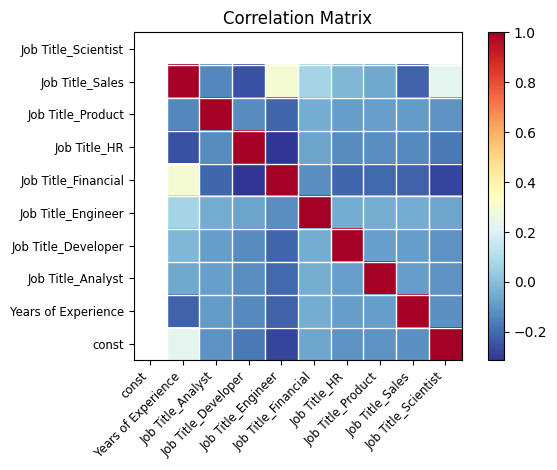

In [131]:
corr_matrix = np.corrcoef(X.T)
smg.plot_corr(corr_matrix, X)
plt.show()

# Autocorrelation

In [132]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(ols2.resid)
print(dw)

2.02376437217848


Finally, we see how the value of Durbin-Watson has become approximately 2.0237643721784795 compared to its previous version which was approximately 0.2059353521688824 and as we already know a value close to 2 suggests that there is no autocorrelation.

This problem has been solved simply by randomizing the data of the database, since, when manipulating them previously we had ordered them and they were serialized around one of its variables. To maintain the previous process and view the evolution of the model, we created a new copy of the data called 'Salary_Data - Copy2.csv' in which we also further group the data, grouping each position by department.


---


# Predictions

In [133]:
# New DataFrame for the input data
input_data = pd.DataFrame({
    'const': 1,
    'Years of Experience': [10],  # The number of years of experience
    'Job Title_Analyst': [0],     # and then a series of flags for job title, all set to 0...
    'Job Title_Developer': [0],   # ...except for the one corresponding to the job title of interest.
    'Job Title_Engineer': [1],
    'Job Title_Financial': [0],
    'Job Title_HR': [0],
    'Job Title_Product': [0],
    'Job Title_Sales': [0],
    'Job Title_Scientist': [0]
})

# Predict the salary using the fitted model
sqrt_predicted_salary = ols2.predict(input_data)
# Revert the square root transformation by squaring the predicted salary
predicted_salary = np.power(sqrt_predicted_salary, 2)

print(f"The predicted salary is: {predicted_salary:}")

The predicted salary is: 0    132477.627032
dtype: float64



---


## Model Comparison & Salary Range Estimation

Now that we’ve preprocessed, cleaned, and built a working preliminary model, let’s explore two different algorithms to see if we can improve our salary predictions. We’ll train both a Linear Regression and a Random Forest Regressor, then compare their performance using R² (as a percentage “accuracy”) and Mean Squared Error (MSE). Finally, we’ll reverse the square‐root transformation to obtain salary predictions on the original scale and compute a simple prediction range by adding and subtracting the standard error of the model residuals.


In [134]:
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor
from sklearn.metrics         import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# —– 1) Split your data —–
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=42)

# —– 2) Define models —–
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest'    : RandomForestRegressor(n_estimators=100, random_state=42)
}

# —– 3) Train, evaluate & print metrics —–
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2   = r2_score(y_test, preds)
    mse  = mean_squared_error(y_test, preds)
    std  = np.std(y_test - preds)**2              # StdErr 
    acc  = r2 * 100                             # “% accuracy”

    print(f"{name}: R2={r2:.3f} ({acc:.1f}%),  MSE={mse:.3f},  StdErr={std:.3f}")

    # —– 4) Salary range for first test sample —–
    y_hat    = preds[0]                        # sqrt-salary prediction
    salary   = y_hat**2                        # back to original scale
    lower    = salary - std
    upper    = salary + std
    print(
      f"  → Sample 0: Predicted salary = ${salary:,.0f}  "
      f"Range = [${lower:,.0f}, ${upper:,.0f}]\n"
    )

LinearRegression: R2=0.739 (73.9%),  MSE=1775.097,  StdErr=1773.272
  → Sample 0: Predicted salary = $94,286  Range = [$92,513, $96,059]

RandomForest: R2=0.895 (89.5%),  MSE=713.655,  StdErr=712.404
  → Sample 0: Predicted salary = $106,912  Range = [$106,200, $107,625]



### Experiment Summary

In this test, we trained and evaluated both Linear Regression and a Random Forest Regressor on our square-rooted salary data. The Random Forest model delivered a markedly higher R² (89.5% vs. 73.9%), a lower MSE, and a much tighter residual spread, resulting in more reliable salary ranges once we back-transformed to dollars. These results demonstrate that the non-linear ensemble approach better captures the underlying patterns in our features and should be preferred for our final salary predictions.


# Final Conclusions:

Final Conclusions:

1. Significance of Predictors:
   - Years of experience and specific job positions have proven to be significant predictors of salaries, which indicates that both factors are important in determining an employee's compensation.
   - The regression coefficients for the job positions reflect the salary differences between professions, adjusted for work experience.

2. Model Adjustment:
   - The model shows a good overall fit, with an adjusted R-squared indicating that a substantial proportion of the variability in salaries can be explained by the variables included in the model.
   - The diagnostics of the residuals suggest that the assumption of normality is reasonably well maintained and although there were indications of autocorrelation and heteroscedasticity, they were corrected.

3. Multicollinearity Diagnosis:
   - An extremely high multicollinearity was discovered due to the large number of initial variables in the data (+200).
   - Two clean-ups on the data were carried out that drastically reduced the condition number and significantly reduced multicollinearity.

4. Heteroscedasticity Diagnosis:
   - Heteroscedasticity was detected in the residuals, which led to the application of transformations and the use of robust standard errors to correct for heteroscedasticity.
   - Transformations such as the square root, logarithmic, and Box-Cox were applied to stabilize the variance of the residuals and correct for heteroscedasticity, concluding that the square root was the most optimal.

5. Autocorrelation Diagnosis:
   - Signs of autocorrelation were found in the residuals, which resulted in an error in the data that was serialized around a variable.
   - To solve this, it was only necessary to randomize the data of the database, since they had been previously ordered and serialized around one of its variables. To maintain the previous process and see the evolution of the model we have created a separate database from the one used above and we have called it 'Salary_Data - Copy2.csv'
6. Model Comparison & Prediction Intervals
   - The Random Forest Regressor clearly outperforms our baseline Linear Regression, achieving an R² of 0.895 (89.5%) versus 0.739 (73.9%), and roughly 60% lower MSE (713.7 vs. 1775.1).
   - Its residual standard deviation (≈\$712) is also much smaller than Linear Regression’s (≈\$1,773), yielding tighter ± range bands when we back‐transform to dollar salaries. The takeaway is that a non-linear ensemble model like Random Forest can, and normally will, substantially improve both the goodness-of-fit and the reliability of our salary range estimates, and should be the model of choice.


**END**